# Analysis of the Iris Data Set
***

Author: Irene Kilgannon

## Background to Fisher's Iris Data Set

In 1928 Edgar Anderson published his paper entitled ['The Problem of Species in the Northern Blue Flags, _Iris versicolor_ and _Iris virginica_'](https://www.biodiversitylibrary.org/page/15997721). Anderson was a evolutionary biologist interested in answering two questions namely, what are species and how have they originated? Between 1923 and 1928 he and his team studied _Iris versicolor_, at a number of different sites from Ontario in Canada to Alabama in the United States, by measuring a number of different iris characteristics. Surprisingly his study found that there were actually two different iris species present, _Iris versicolor_ and _Iris virginia_ and that it was possible to differentiate between them by geographic location. 

The data set is commonly known as Fisher's Iris Data set after the statistician and biologist, Ronald Fisher. The data measurements for _Isis setosa_ and _Iris versicolor_ were collected by Anderson from the same colony of plants in the Gaspé Peninsula, Quebec in 1935. According to [Unwin and Kleinman](https://www.jstor.org/stable/4331526?seq=13) the _Iris virginica_ data samples were from Anderson's original research and were collected in Camden, Tennessee. Fisher collated and analysed the data and in 1936 published his results in the Annals of Eugenics [The Use of Multiple Measurements in Taxonomic Problems](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x). He used a statistical method, linear discriminant analysis to attempt to distinguish the different iris species from each other. He found that _Iris setosa_ was easily distinguishable from the other two iris species using this method. 

Fisher's data set can be seen in his published paper but, in our computer age, the data set is available to download at [UCI Maching Learning Repository](https://archive.ics.uci.edu/dataset/53/iris). The data set is very widely used with currently over 700,000 views of the data set on the UCI website.

## Import the required modules

In [1]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data set

In [2]:
# Load the data set
iris = pd.read_csv("iris_data.csv", header = None)

## Explore the Data Set

In [3]:
# Overview of the data set
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The quick overview of the data set reveals that there are no column names in the imported csv file.

The column names were obtained from the variables table on the [information page of the iris data set](https://archive.ics.uci.edu/dataset/53/iris). They are sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm and species.

Initally Problem loosing 1 row of data doing it this way. it is converting the data in row 0 to the column names direcly. need to add the column names above the row. Fixed the problem using the argument [header = None](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html) when reading in the csv file. 

In [4]:
# Add column names
iris.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## The Variables in the Data Set

In [5]:
iris['species'].dtype

dtype('O')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris['species'] = iris['species'].astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sepal_length_cm  150 non-null    float64 
 1   sepal_width_cm   150 non-null    float64 
 2   petal_length_cm  150 non-null    float64 
 3   petal_width_cm   150 non-null    float64 
 4   species          150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [8]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [9]:
# Summary statistics of the data set
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.groupby('species').describe().transpose()

species                Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length_cm count    50.000000        50.000000       50.000000
                mean      5.006000         5.936000        6.588000
                std       0.352490         0.516171        0.635880
                min       4.300000         4.900000        4.900000
                25%       4.800000         5.600000        6.225000
                50%       5.000000         5.900000        6.500000
                75%       5.200000         6.300000        6.900000
                max       5.800000         7.000000        7.900000
sepal_width_cm  count    50.000000        50.000000       50.000000
                mean      3.418000         2.770000        2.974000
                std       0.381024         0.313798        0.322497
                min       2.300000         2.000000        2.200000
                25%       3.125000         2.525000        2.800000
                50%       3.400000         2.800000        3.000000
                75%       3.675000         3.000000        3.175000
                max       4.400000         3.400000        3.800000
petal_length_cm count    50.000000        50.000000       50.000000
                mean      1.464000         4.260000        5.552000
                std       0.173511         0.469911        0.551895
                min       1.000000         3.000000        4.500000
                25%       1.400000         4.000000        5.100000
                50%       1.500000         4.350000        5.550000
                75%       1.575000         4.600000        5.875000
                max       1.900000         5.100000        6.900000
petal_width_cm  count    50.000000        50.000000       50.000000
                mean      0.244000         1.326000        2.026000
                std       0.107210         0.197753        0.274650
                min       0.100000         1.000000        1.400000
                25%       0.200000         1.200000        1.800000
                50%       0.200000         1.300000        2.000000
                75%       0.300000         1.500000        2.300000
                max       0.600000         1.800000        2.500000

In [11]:
#iris.transform(iris.groupby('species').describe())

In [12]:
iris.groupby('species').median()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [13]:
iris['species'].unique()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [14]:
setosa = iris[iris['species'] == 'Iris-setosa']
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


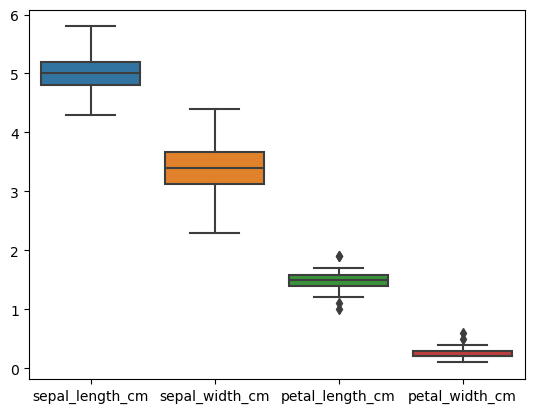

In [15]:
#Box plot of above, add titles

sns.boxplot(setosa)
plt.show()

In [16]:
versicolor = iris[iris['species'] == 'Iris-versicolor']
versicolor.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


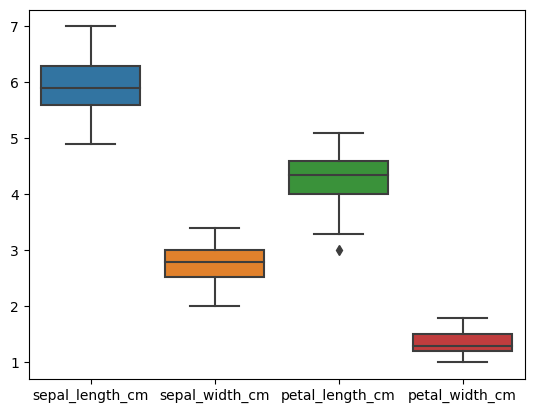

In [17]:
sns.boxplot(versicolor)
plt.show()

In [18]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


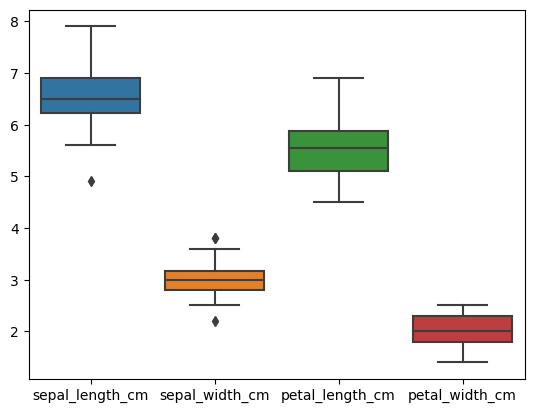

In [19]:
sns.boxplot(virginica)
plt.show()

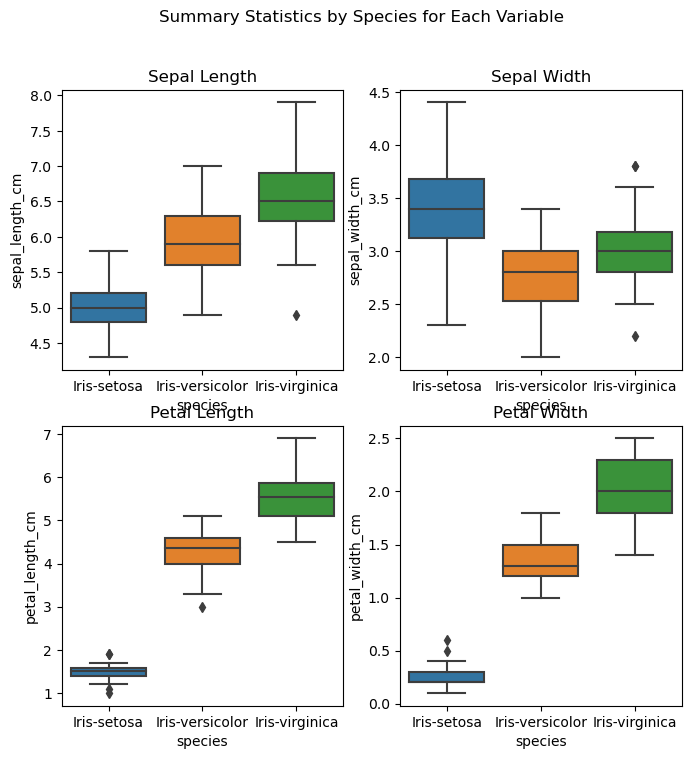

In [20]:
## Trying to compare across the three species. Looks squashed. 

fig, axes = plt.subplots(2,2, figsize = (8, 8))
sns.boxplot(ax = axes[0, 0], x = 'species', y = 'sepal_length_cm', data = iris)
sns.boxplot(ax = axes[0, 1], x = iris['species'], y= iris['sepal_width_cm'])
sns.boxplot(ax = axes[1, 0], x = iris['species'], y = iris['petal_length_cm'])
sns.boxplot(ax = axes[1, 1], x = iris['species'], y = iris['petal_width_cm'])
plt.suptitle('Summary Statistics by Species for Each Variable')
axes[0,0].set_title('Sepal Length')
axes[0,1].set_title('Sepal Width')
axes[1,0].set_title('Petal Length')
axes[1,1].set_title('Petal Width')
#plt.savefig('Boxplot.png')
plt.show()

__Summary of the Data Set__

It is a small data set with 150 rows and five columns with each row corresponding to a different flower sample. There are three different iris species, _Iris setosa_, _Iris versicolor_ and _Iris virginica_ with 50 samples for each species. There is no data missing from any of the columns.


![iris](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png)

Four measurements (or variables) were taken for each flower examined:
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Each iris has three true petals and three sepals. The three petals are upright and are also know as standards. Sepals are a modified leaf and are sometimes called falls. Sepals are usually green in colour and its function is to protect the developing flower bud. When the flower has bloomed the iris' sepal is described as "the landing pad for bumblebees" by the [US Forest Service](https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml). This diagram from nicely illustrates the petals and the sepals.

## Histogram of each variable

A histogram of each variable must be saved to a png file.

TO DO
overall hist
breakdown by species. 

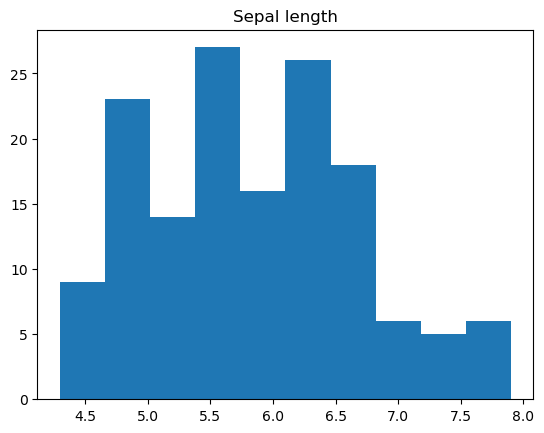

In [21]:
plt.hist(iris['sepal_length_cm'])
plt.title('Sepal length')
plt.show()

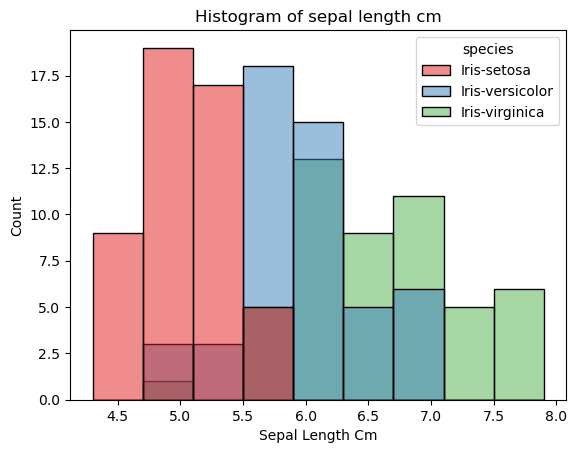

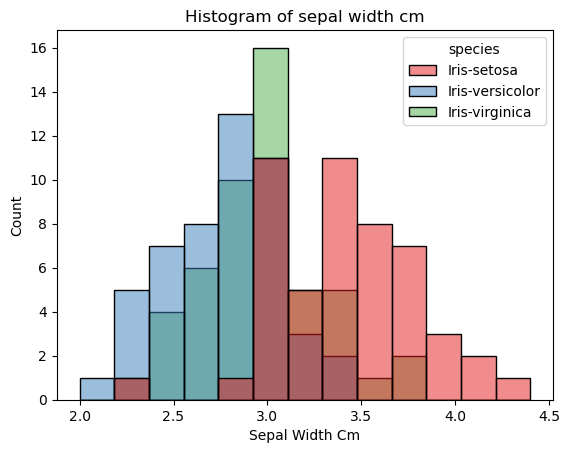

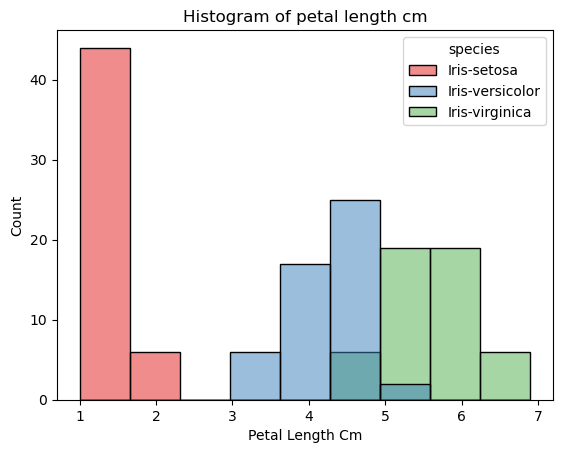

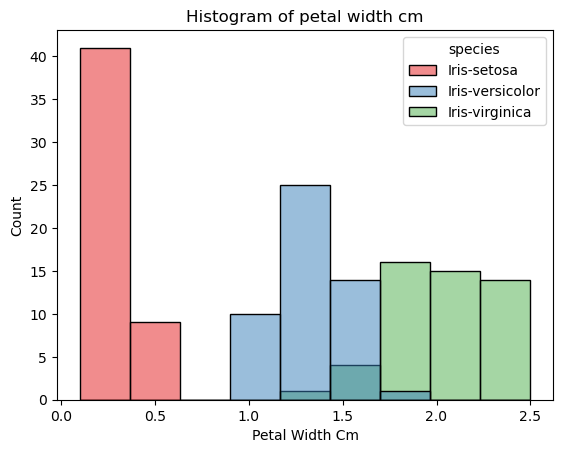

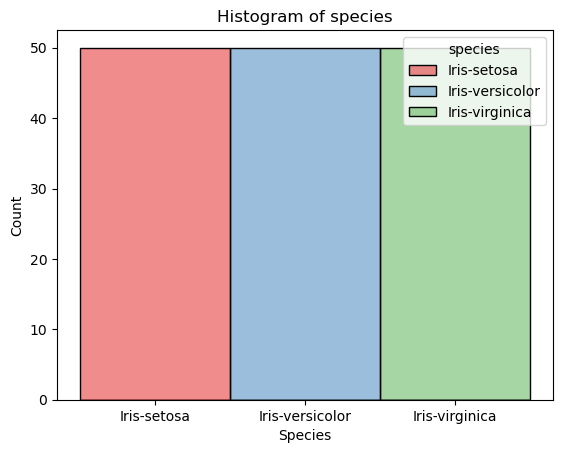

In [22]:
for col in iris:
    sns.set_palette("Set1")
    sns.histplot(x = col, data = iris, hue = 'species')
    plt.title(f"Histogram of {col.replace('_', ' ')}")
    plt.xlabel(f"{col.replace('_', ' ').title()}")
    #plt.savefig(f'{col}.png')
    plt.show()

## Scatter plot of each pair of variables. 

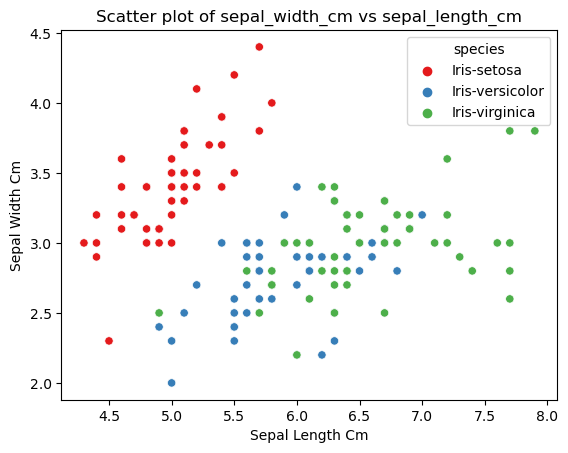

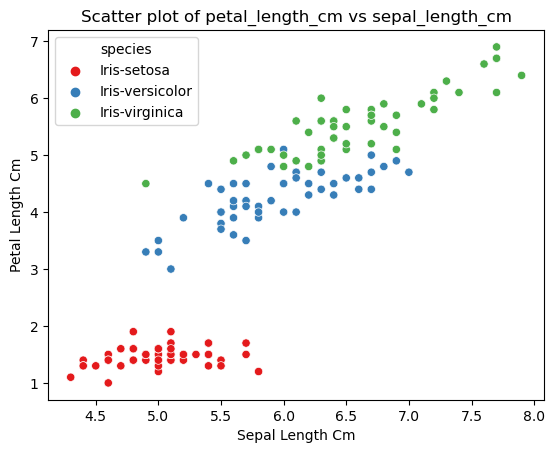

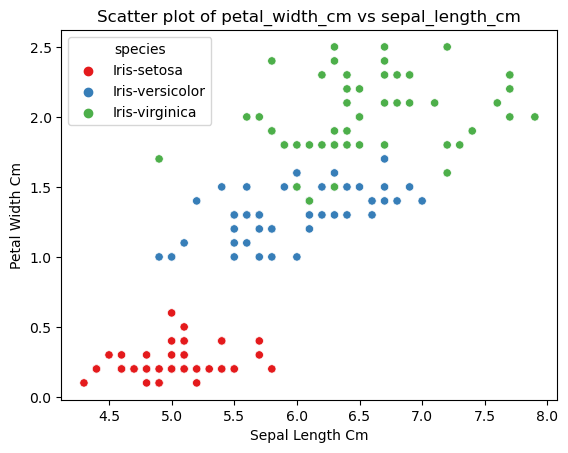

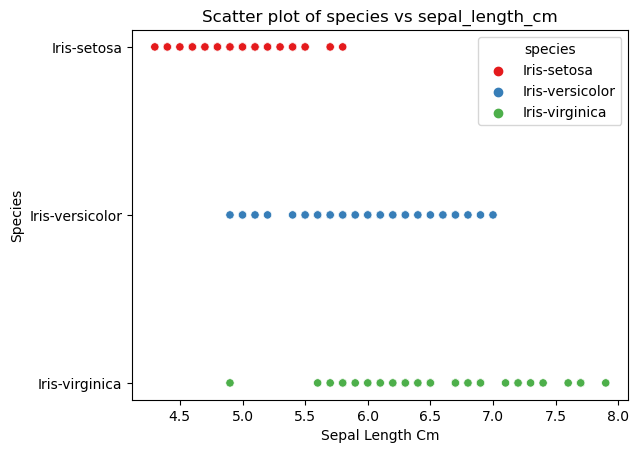

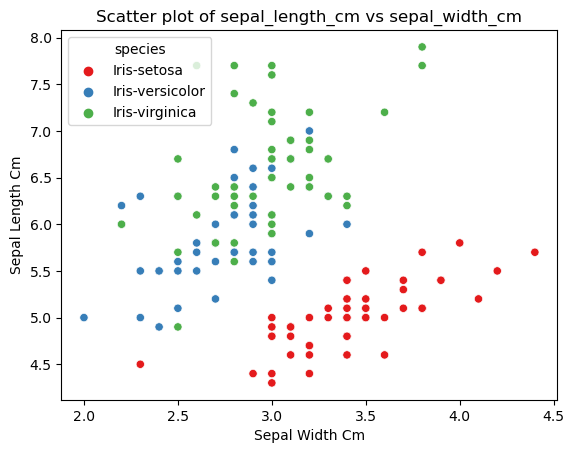

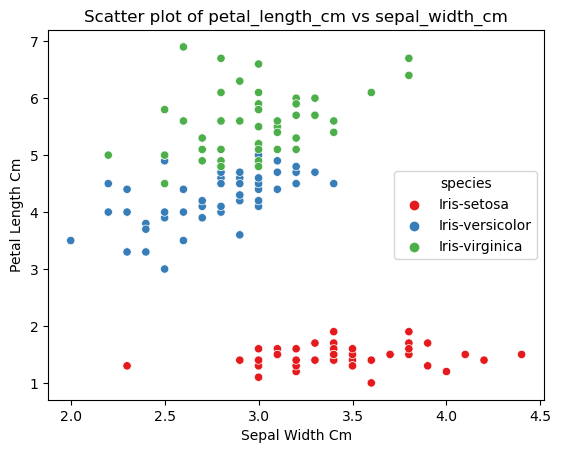

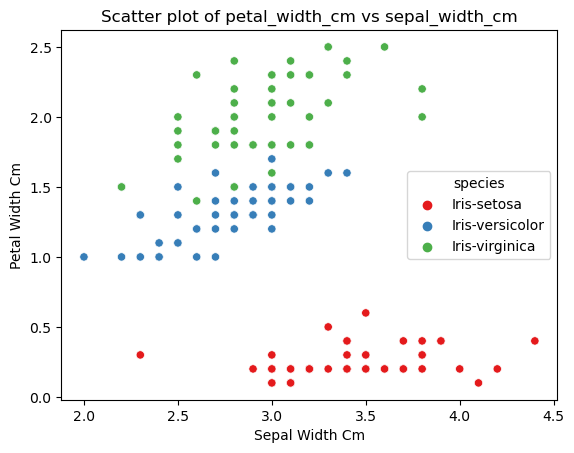

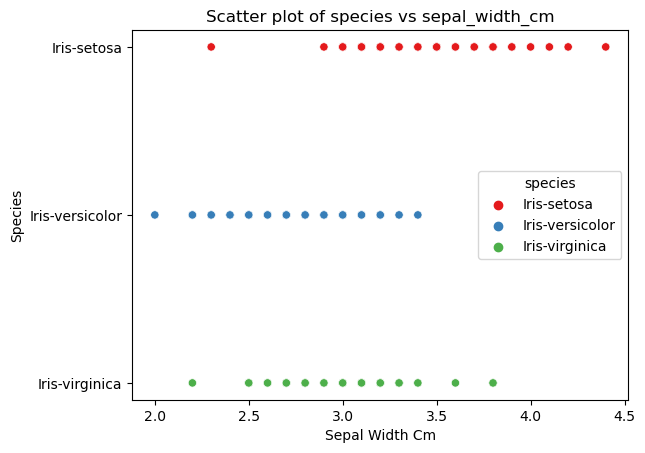

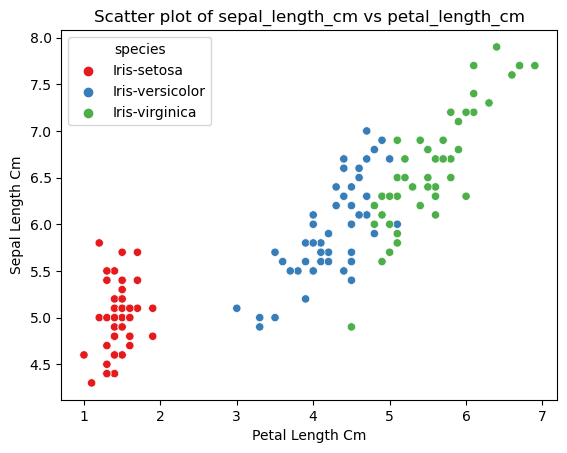

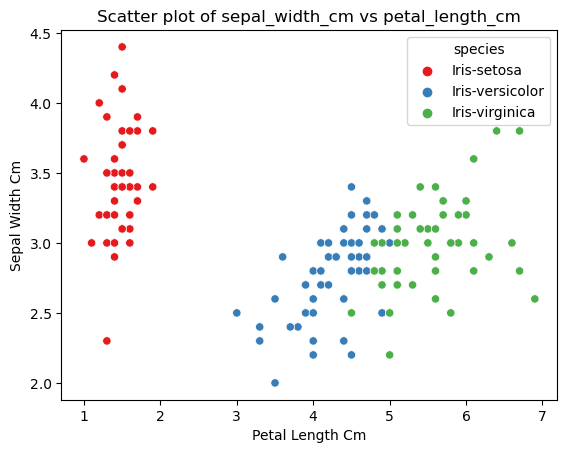

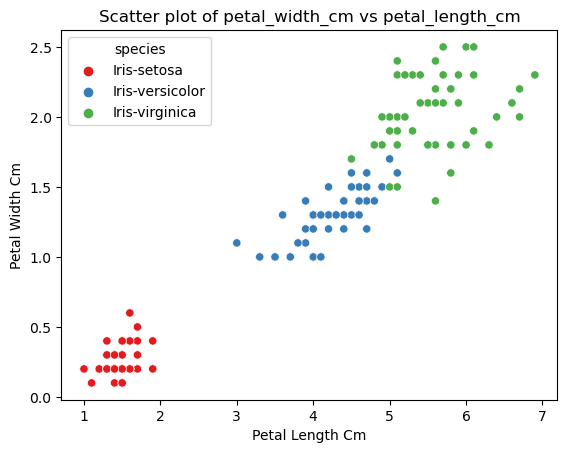

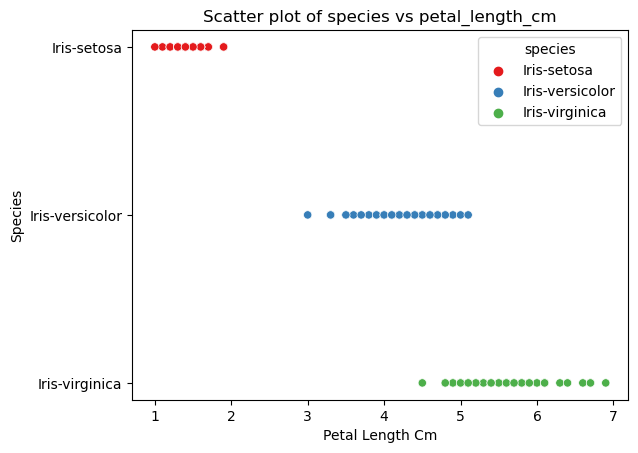

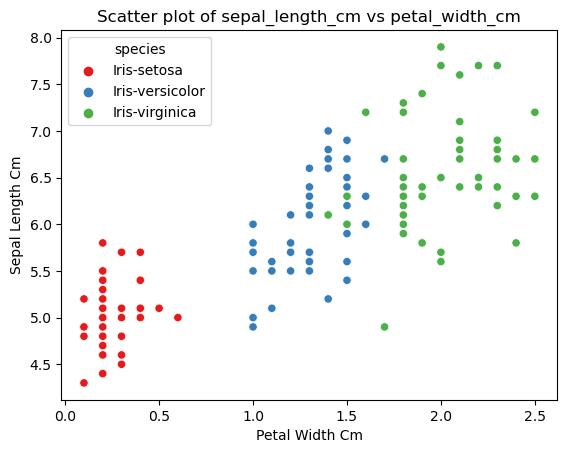

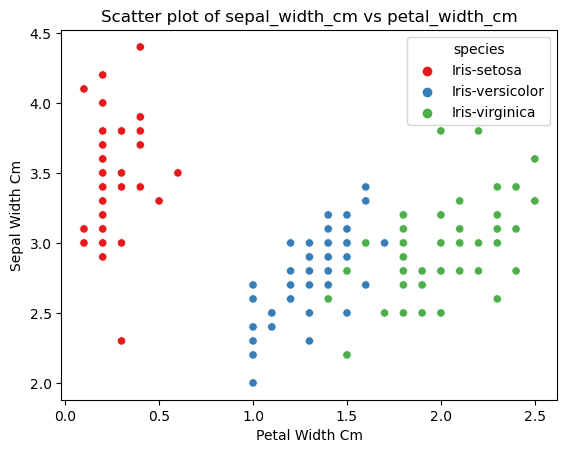

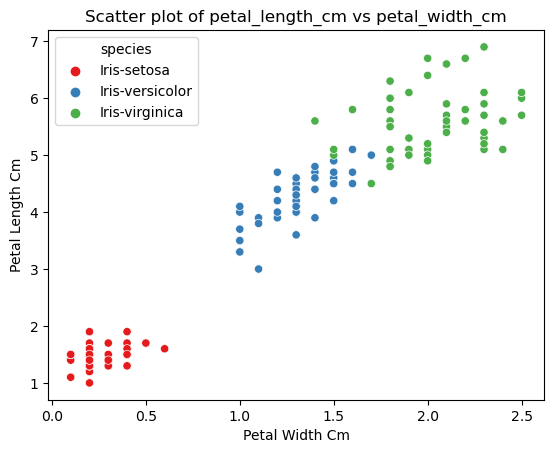

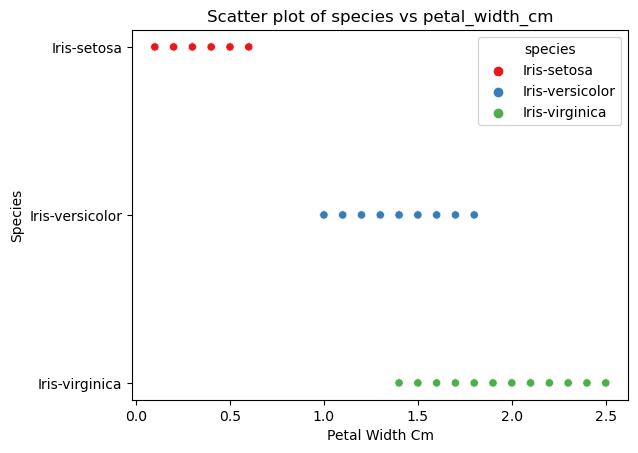

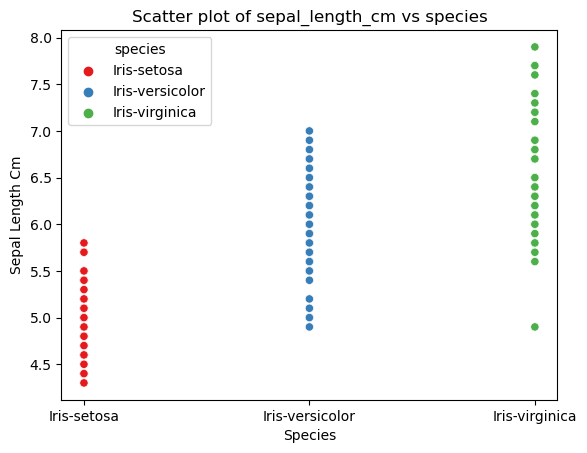

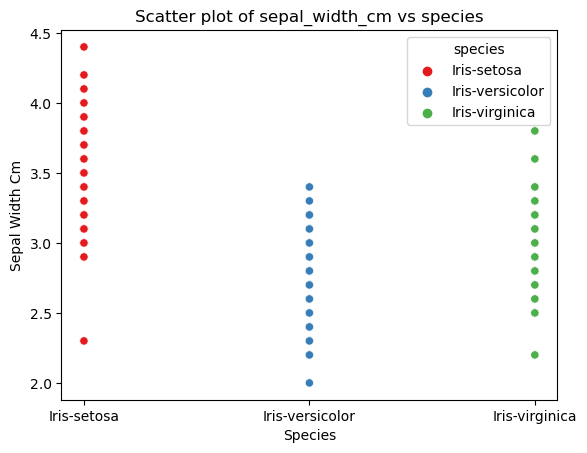

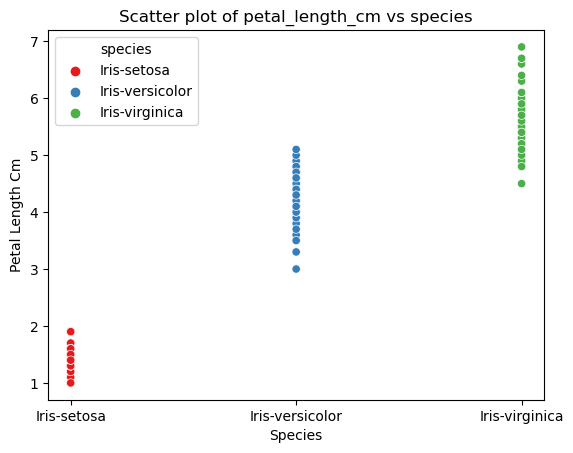

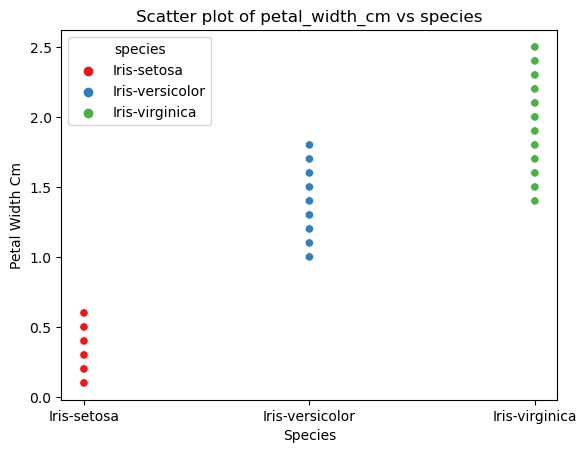

In [23]:
def plot_scatter(df):
    for x in df:
        for y in df:
            if x == y or df[x].dtype == 'O' or df[y].dtype == 'O':
                continue
            else:
                sns.scatterplot(data = df, x = x, y = y, hue = 'species')
                plt.title(f"Scatter plot of {y} vs {x}")
                plt.xlabel(f"{x.title().replace('_', ' ')}")
                plt.ylabel(f"{y.title().replace('_', ' ')}")
                plt.show()

plot_scatter(iris)

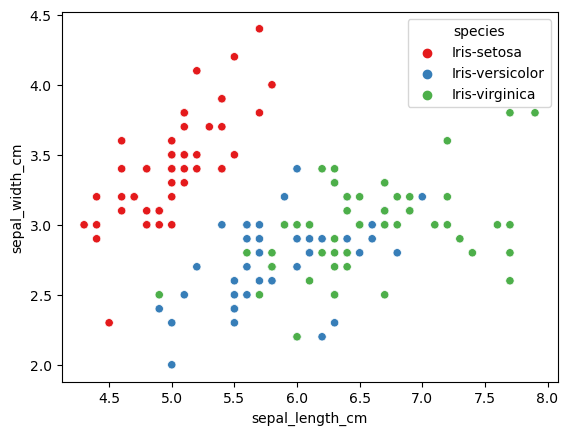

In [24]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'species')
plt.show()

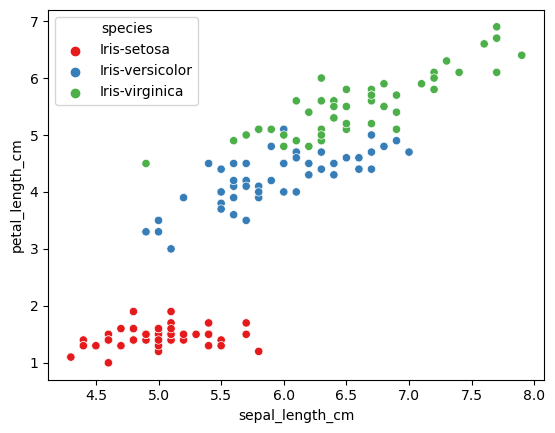

In [25]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

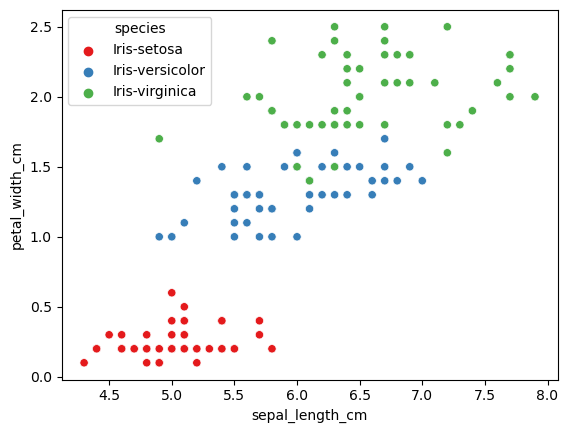

In [26]:
sns.scatterplot(data = iris, x = 'sepal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

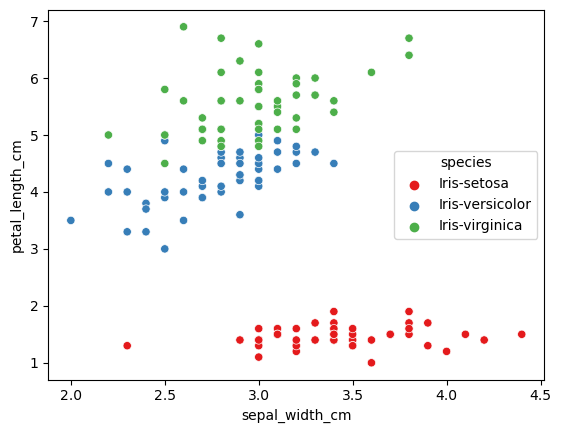

In [27]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_length_cm', hue = 'species')
plt.show()

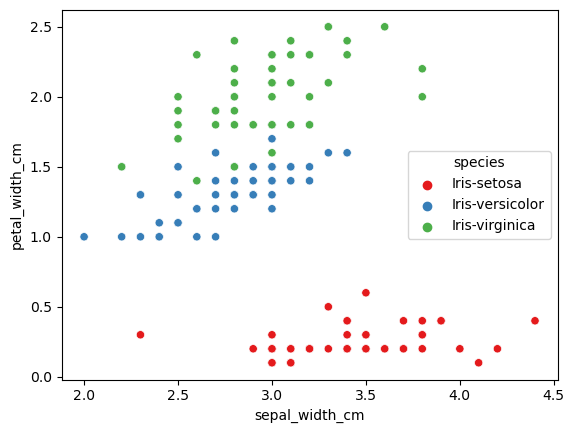

In [28]:
sns.scatterplot(data = iris, x = 'sepal_width_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

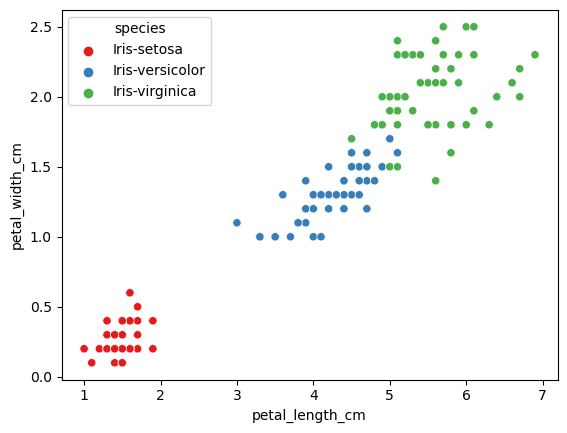

In [29]:
sns.scatterplot(data = iris, x = 'petal_length_cm', y = 'petal_width_cm', hue = 'species')
plt.show()

Pairplots

https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


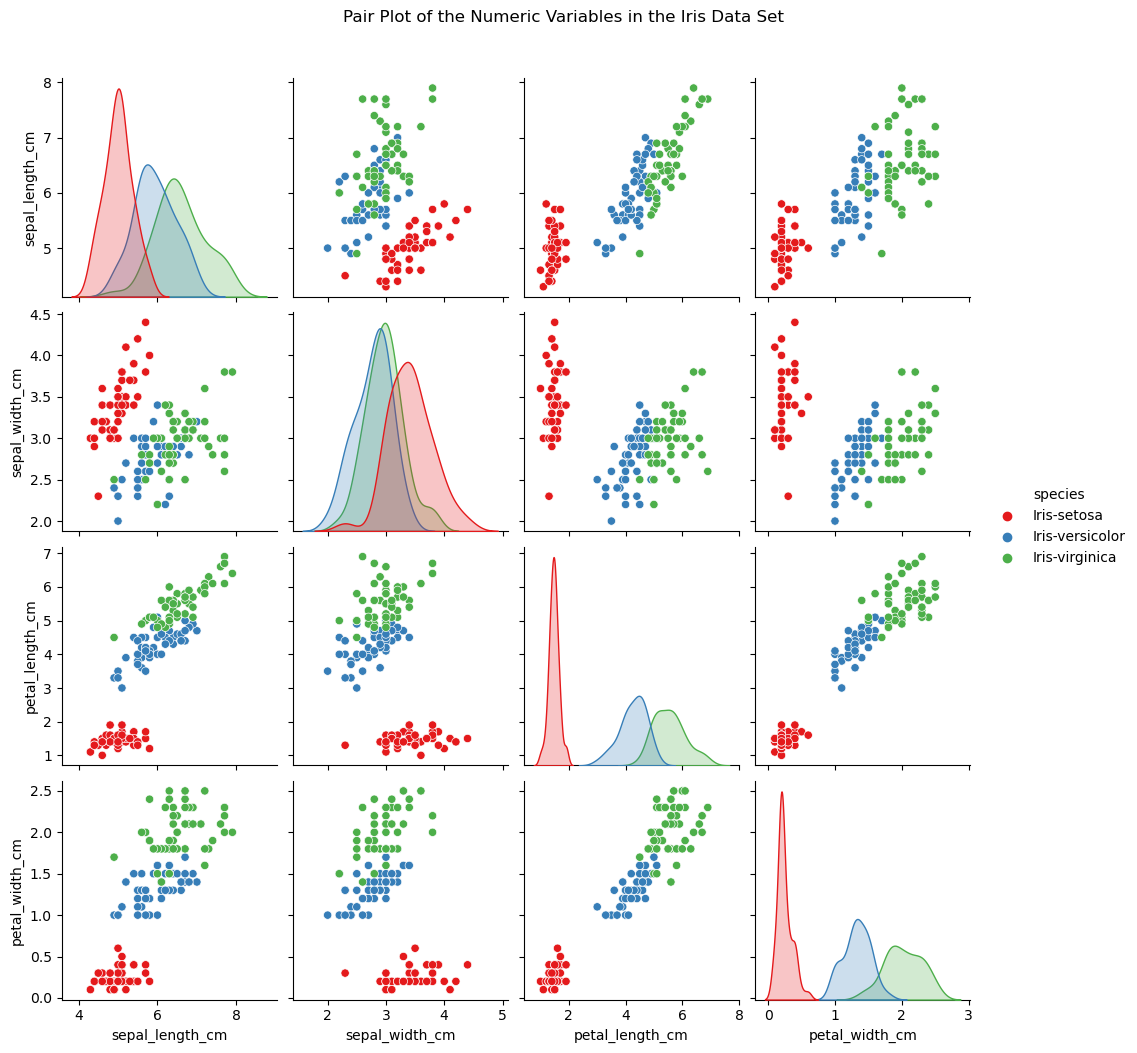

In [30]:
sns.pairplot(iris, hue = 'species')
plt.suptitle('Pair Plot of the Numeric Variables in the Iris Data Set', y = 1.05)
plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


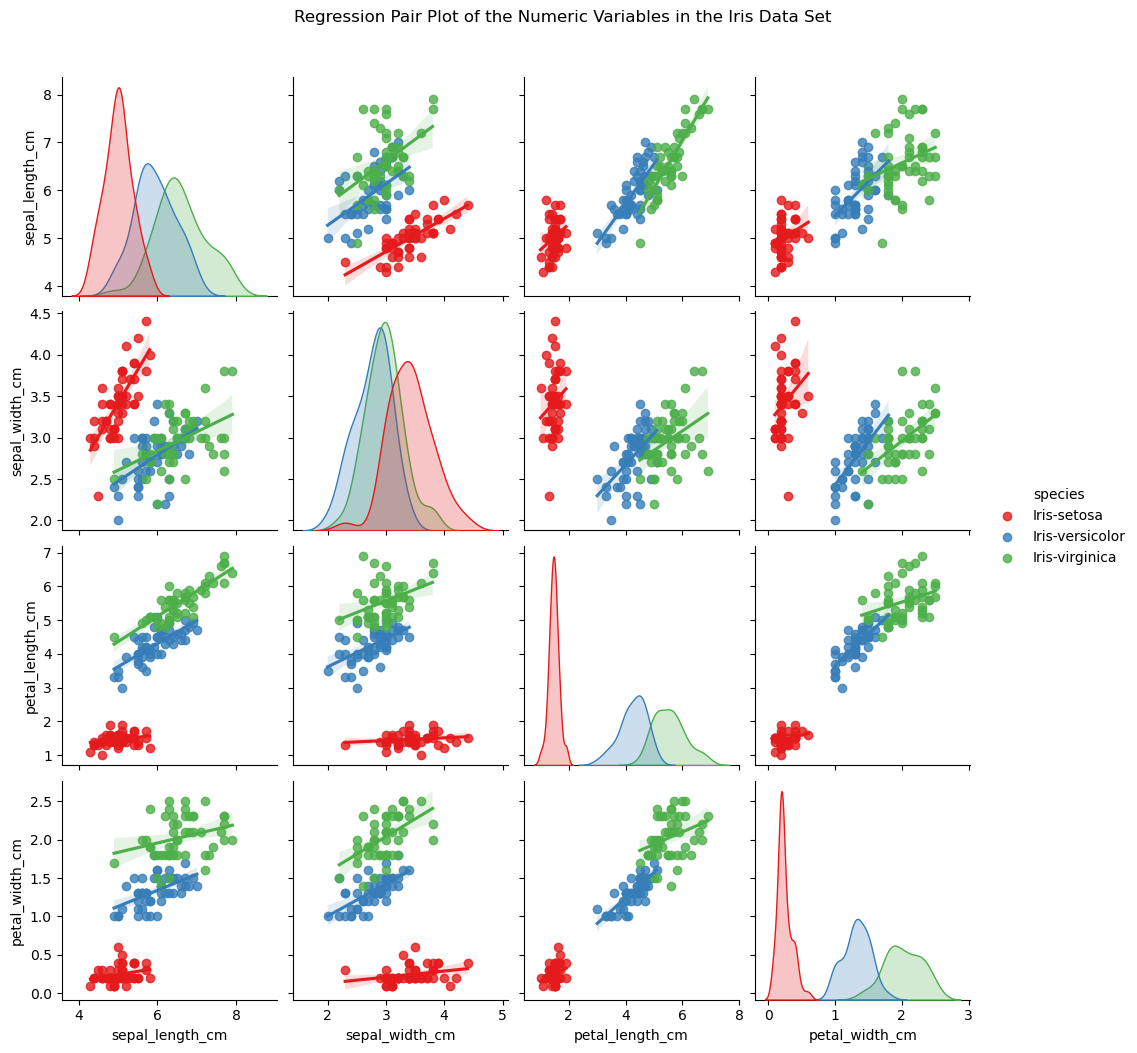

In [31]:
sns.pairplot(iris, hue = 'species', kind = 'reg')
plt.suptitle('Regression Pair Plot of the Numeric Variables in the Iris Data Set', y = 1.05)
plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


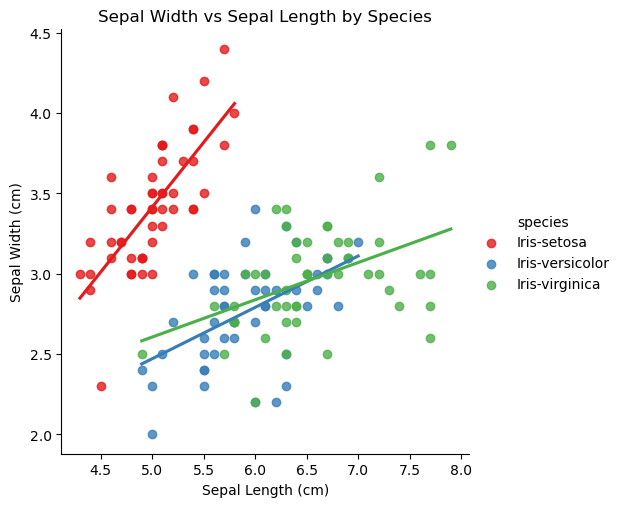

In [32]:
# regression lines

sns.lmplot(iris, x = 'sepal_length_cm', y = 'sepal_width_cm', ci = None, hue = 'species')

# Adding title, x and y labels to the plot.
plt.title('Sepal Width vs Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Display the plot
plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


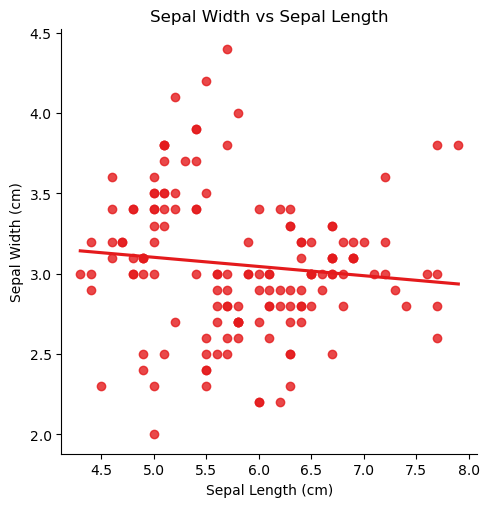

In [33]:
sns.lmplot(iris, x = 'sepal_length_cm', y = 'sepal_width_cm', ci = None)

# Adding title, x and y labels to the plot.
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Display the plot
plt.show()

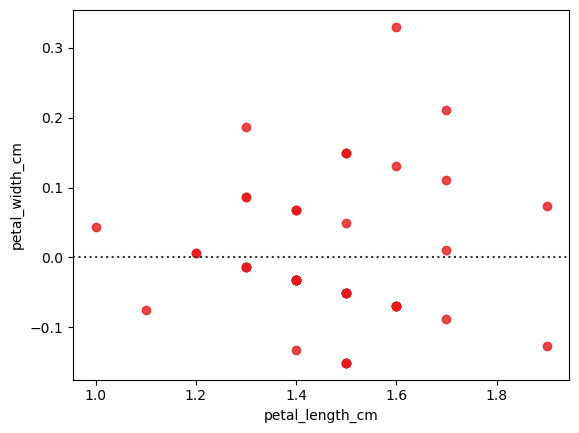

In [34]:
sns.residplot(setosa, x = 'petal_length_cm', y = 'petal_width_cm')
plt.show()


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Instantiate the model
reg = LinearRegression()

# Select the columns of interest from the dataset
X = iris[['petal_length_cm', 'sepal_length_cm', 'sepal_width_cm']].values
y = iris['petal_width_cm'].values

# Reshape the X data from a 1-D array to a 2-D array.
#X = X.reshape(-1, 1)

# Split the data into training set and test set data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 47)

# Fit the training data to the model
reg.fit(X_train, y_train)

# Predict the y data points by using the predict function on the X_test data.
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))

0.9439548358685618


In [37]:
print(f'Predictions: {y_pred[:5].round(3)},\nActual values: {y_test[:5]}\n\n')

Predictions: [0.272 0.23  1.432 0.421 0.375],
Actual values: [0.2 0.2 1.3 0.4 0.4]




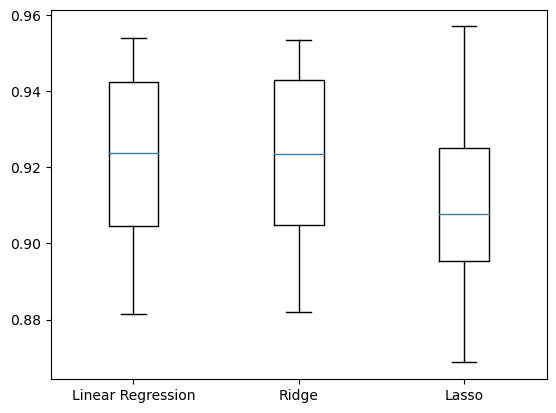

Test Set Accuracy Linear Regression: 0.9439548358685618
Test Set Accuracy Ridge: 0.9438709329306976
Test Set Accuracy Lasso: 0.9277446185509046


In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


# Select the columns of interest from the dataset
X = iris[['petal_length_cm', 'sepal_length_cm', 'sepal_width_cm']].values
y = iris['petal_width_cm'].values
# Split the data into training set and test set data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 47)


# Instantiate the model
models = {'Linear Regression': LinearRegression(), 'Ridge': Ridge(alpha = 0.1), 'Lasso' : Lasso(alpha = 0.1)}

results = []

for model in models.values():
    kf = KFold(n_splits= 6, random_state = 47, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_results)
plt.boxplot(results, labels= models.keys())
plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Test Set Accuracy {}: {}'.format(name, test_score))
# Reshape the X data from a 1-D array to a 2-D array.
#X = X.reshape(-1, 1)

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


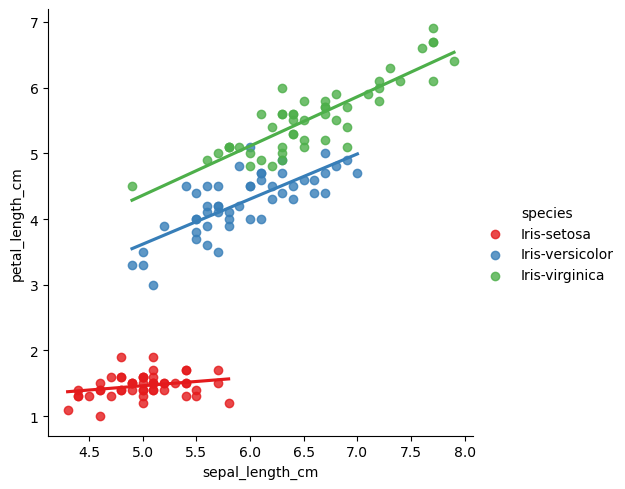

In [ ]:
# regression lines

sns.lmplot(iris, x = 'sepal_length_cm', y = 'petal_length_cm', ci = None, hue = 'species')


# Adding title, x and y labels to the plot.
plt.title('')
#plt.xlabel('Sepal Length (cm)')
# plt.ylabel('Petal Length (cm)')

# Display the plot
plt.show()


In [ ]:
setosa = iris[iris['species'] == 'Iris-setosa']
versicolor = iris[iris['species'] == 'Iris-versicolor']
virginica = iris[iris['species'] == 'Iris-virginica']

In [ ]:
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


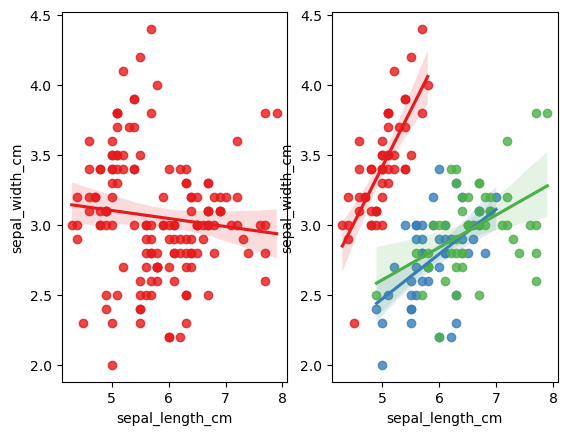

In [ ]:
fig, ax = plt.subplots(1, 2)

sns.regplot(iris, x = 'sepal_length_cm', y = 'sepal_width_cm', ax = ax[0])
sns.regplot(setosa, x = 'sepal_length_cm', y = 'sepal_width_cm', ax = ax[1])
sns.regplot(versicolor, x = 'sepal_length_cm', y = 'sepal_width_cm', ax = ax[1])
sns.regplot(virginica, x = 'sepal_length_cm', y = 'sepal_width_cm', ax = ax[1])
plt.show()

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


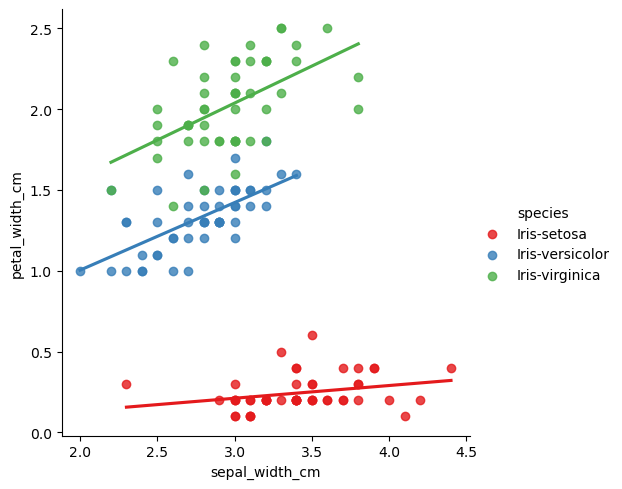

In [ ]:
sns.lmplot(iris, x = 'sepal_width_cm', y = 'petal_width_cm', ci = None, hue = 'species')

In [ ]:
iris.describe(include= 'all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Correlation diagrams

Any other analysis , heatmaps

In [ ]:
iris.drop(['species'], axis = 1).corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


heatmap by flower species

In [ ]:
colors = ['#5A4FCF', '#4ECF99', '#CF4E99']
sns.set_palette(colors)

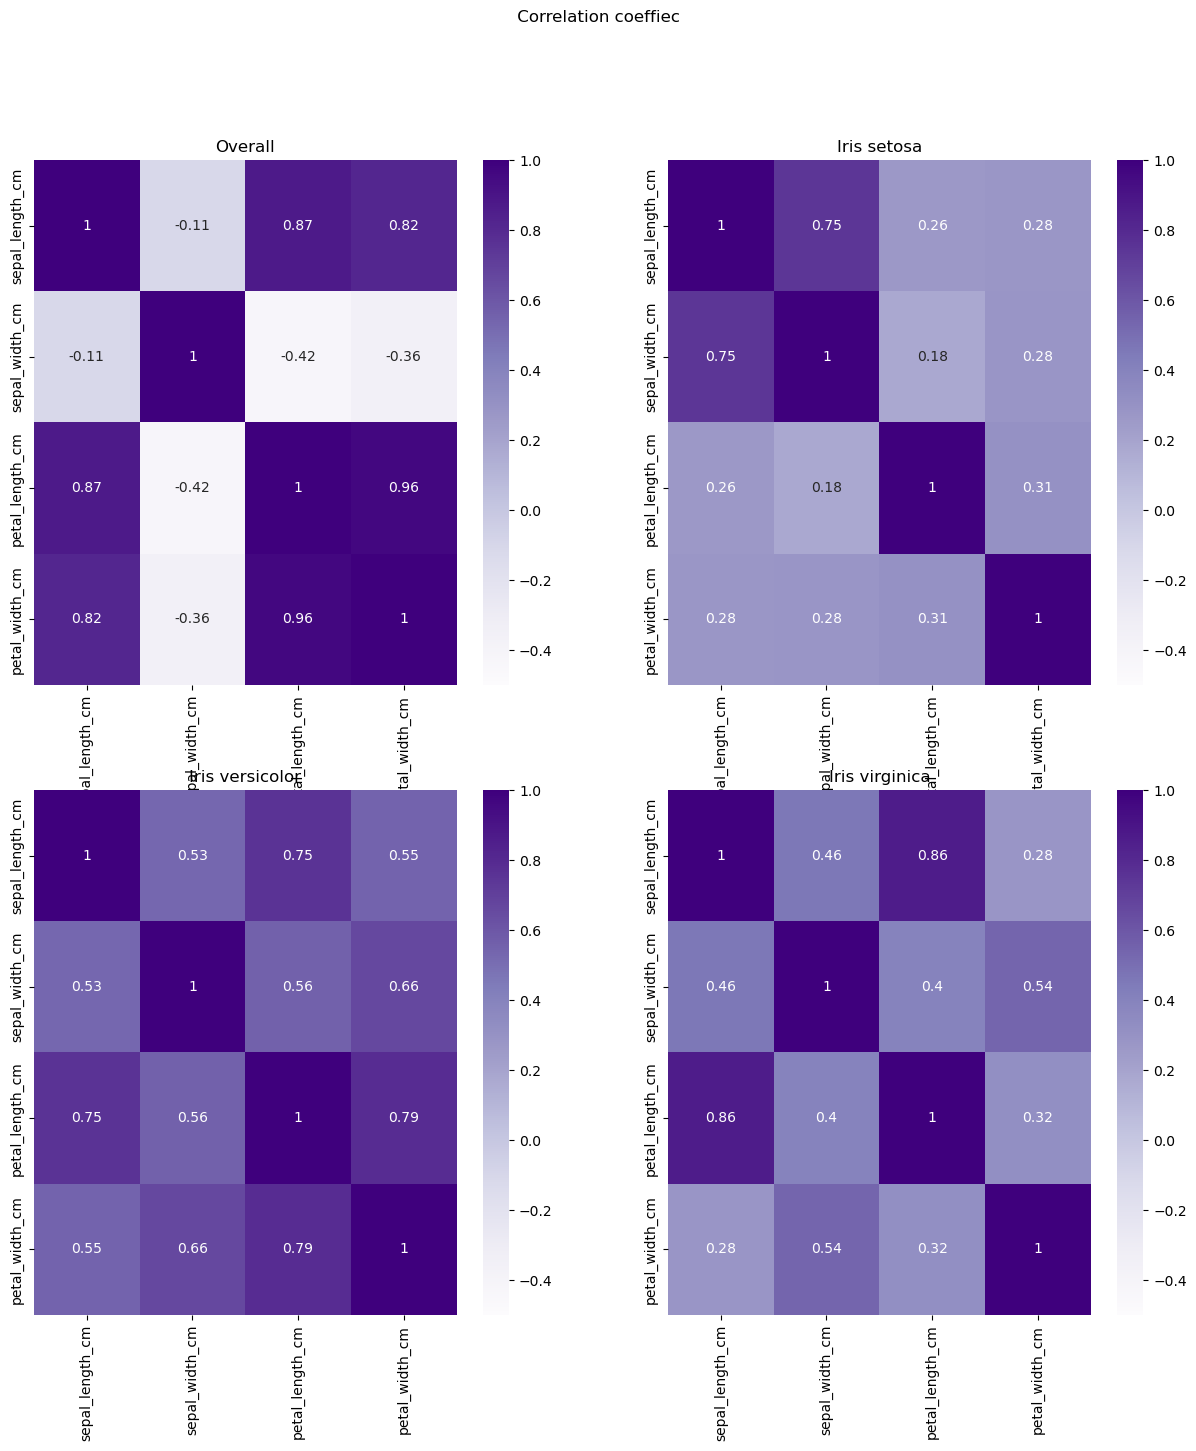

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 15))

sns.heatmap(iris.drop(['species'], axis = 1).corr(), annot = True, ax = ax[0, 0], vmin = -0.5, vmax=1, cmap="Purples")
ax[0,0].set_title('Overall')

sns.heatmap(setosa.drop(['species'], axis = 1).corr(), annot = True, ax = ax[0, 1], vmin = -0.5, vmax=1, cmap="Purples")
ax[0,1].set_title('Iris setosa')
sns.heatmap(versicolor.drop(['species'], axis = 1).corr(), annot = True, ax = ax[1, 0], vmin = -0.5, vmax=1,cmap="Purples")
ax[1,0].set_title('Iris versicolor')
sns.heatmap(virginica.drop(['species'], axis = 1).corr(), annot = True, ax = ax[1,1], vmin = -0.5, vmax=1, cmap="Purples")
ax[1,1].set_title('Iris virginica')

#ax.set_xticklabels(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], rotation=45)

plt.suptitle(' Correlation coeffiec')
#plt.savefig('Heatmap of the Correlation Coefficients')
plt.show()


In [ ]:
setosa['sepal_width_cm'].min()

2.3

In [ ]:
# Calculating range of outliers for the sepal width column
seventy_fifth = setosa['sepal_width_cm'].quantile(0.75)
twenty_fifth = setosa['sepal_width_cm'].quantile(0.25)

s_width_iqr = seventy_fifth - twenty_fifth

upper_limit = seventy_fifth + (1.5 * s_width_iqr)
lower_limit = twenty_fifth - (1.5 * s_width_iqr)

print(f'The lower limit for outliers in the sepal width column for Iris setosa is {lower_limit}.')
print(f'The upper limit for outliers in the sepal width column for Iris setosa is {upper_limit.round(2)}.')

The lower limit for outliers in the sepal width column for Iris setosa is 2.3.
The upper limit for outliers in the sepal width column for Iris setosa is 4.5.


c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


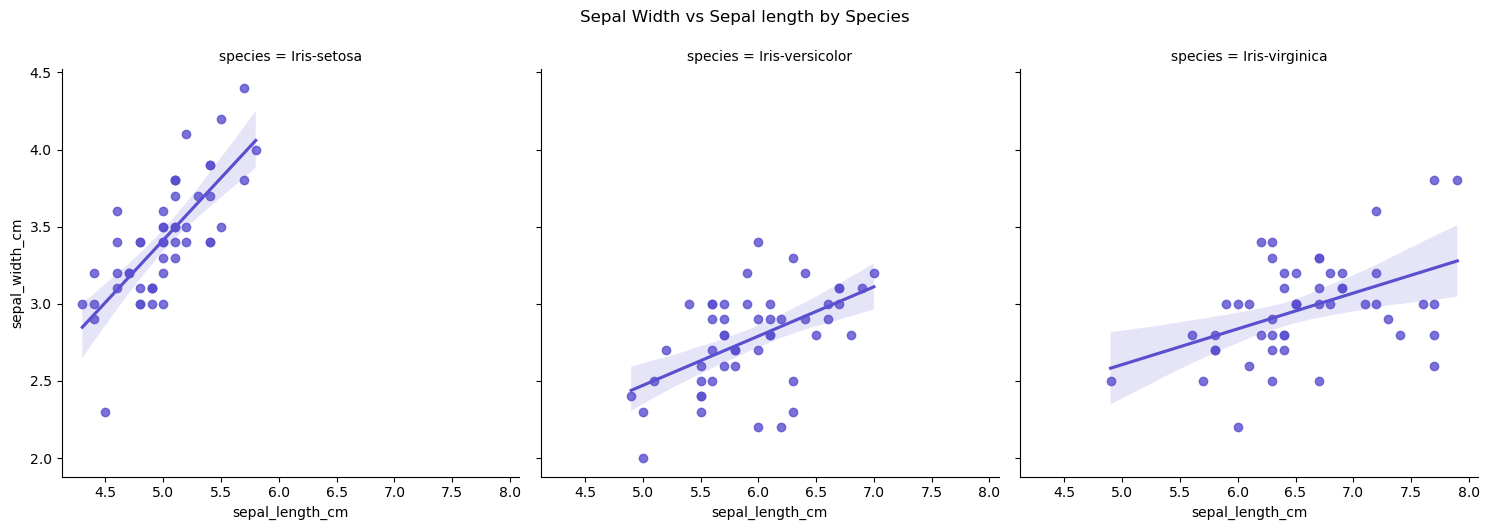

In [ ]:
sns.lmplot(iris, x = 'sepal_length_cm', y = 'sepal_width_cm', col = 'species')
plt.suptitle('Sepal Width vs Sepal length by Species', y = 1.05)
plt.show()

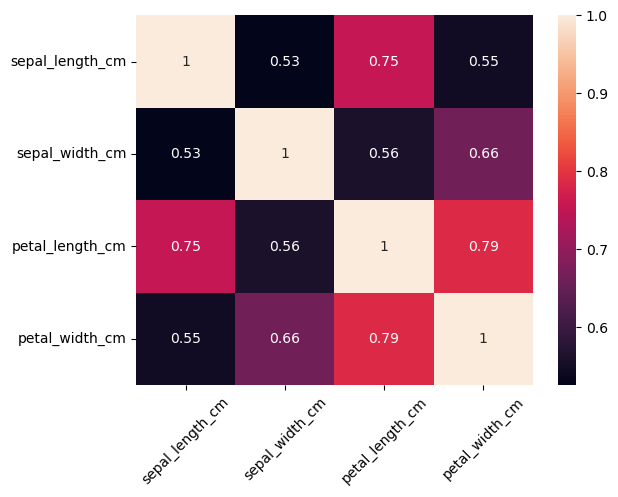

In [ ]:
sns.heatmap(versicolor.drop(['species'], axis = 1).corr(), annot = True)

plt.xticks(rotation = 45)
plt.show()

<Axes: >

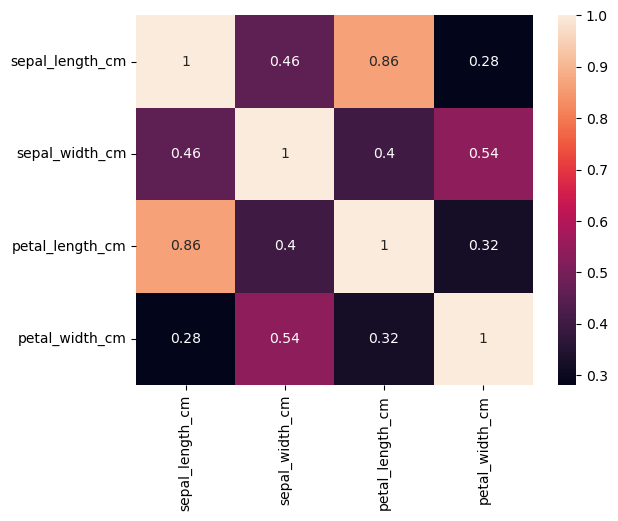

In [ ]:
sns.heatmap(virginica.drop(['species'], axis = 1).corr(), annot = True)

In [ ]:
from statsmodels.formula.api import ols

mdl_petal_width_cm_vs_petal_length = ols("petal_width_cm ~ petal_length_cm", data = iris).fit()

print(mdl_petal_width_cm_vs_petal_length.params)

Intercept         -0.366514
petal_length_cm    0.416419
dtype: float64


In [ ]:
explanatory_data = pd.DataFrame({"petal_length_cm": np.arange(1.0, 3.0)})

petal_length = mdl_petal_width_cm_vs_petal_length.predict(explanatory_data)
prediction_data = explanatory_data.assign(petal_length = petal_length)
print(prediction_data)

   petal_length_cm  petal_length
0              1.0      0.049905
1              2.0      0.466324


ValueError: Could not interpret value `petal_width_cm` for parameter `y`

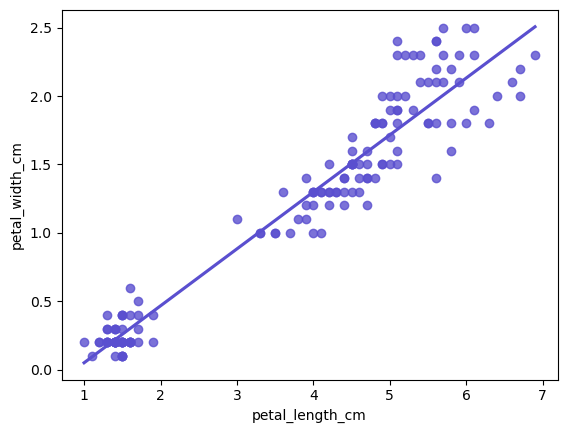

In [ ]:
fig = plt.figure()

sns.regplot(iris, x = 'petal_length_cm', y = 'petal_width_cm', ci = None)

sns.scatterplot(prediction_data, x = 'petal_length_cm', y = 'petal_width_cm', color = 'g', marker = 's')

plt.show()


In [ ]:
print(mdl_petal_width_cm_vs_petal_length.resid)

0     -0.016473
1     -0.016473
2      0.025169
3     -0.058115
4     -0.016473
         ...   
145    0.501135
146    0.184418
147    0.201135
148    0.417851
149    0.042776
Length: 150, dtype: float64


In [ ]:
mdl_petal_width_cm_vs_petal_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         petal_width_cm   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 10 May 2024   Prob (F-statistic):           5.78e-86
Time:                        11:52:53   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3665      0.040     -9.188      0.000      -0.445      -0.288
petal_length_cm     0.4164      0.010     43.320      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.498   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.217
Skew:                           0.353   Prob(JB):                       0.0736
Kurtosis:                       3.579   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mdl_petal_width_cm_vs_petal_length.rsquared

0.9269012279220036

In [ ]:
residuals_sq = mdl_petal_width_cm_vs_petal_length.resid **2
resid_sum_of_sq = sum(residuals_sq)
deg_freedom = len(iris.index) - 2
rse = np.sqrt(resid_sum_of_sq/deg_freedom)
print(f'RES: {rse}')


RES: 0.2070300270022645


In [ ]:
coeffs = mdl_petal_width_cm_vs_petal_length.params

intercept = coeffs[0]
slope = coeffs[1]

sepal_length_cm_1 = intercept + slope * explanatory_data
print(sepal_length_cm_1)

print(sepal_length_cm_1.assign(predictions_auto = mdl_petal_width_cm_vs_petal_length.predict(explanatory_data)))


   petal_length_cm
0         4.757267
1         5.293330
   petal_length_cm  predictions_auto
0         4.757267          4.757267
1         5.293330          5.293330


https://www.simplilearn.com/tutorials/machine-learning-tutorial/machine-learning-steps

In [ ]:
# linear regression with scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])


In [ ]:
X = iris.drop(['species'], axis= 1)
y = iris[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
pred_y = Linear_model.predict(X_test)
pred_y

array([[ 1.24042717],
       [-0.0470517 ],
       [ 2.24766081],
       [ 1.35145613],
       [ 1.29992031],
       [ 0.01086695],
       [ 1.05103684],
       [ 1.82711171],
       [ 1.37586787],
       [ 1.06856218],
       [ 1.70290027],
       [-0.08634371],
       [-0.16475544],
       [-0.07704022],
       [-0.03686594],
       [ 1.39985227],
       [ 2.00557698],
       [ 1.04920521],
       [ 1.28290593],
       [ 1.97653781],
       [ 0.01671723],
       [ 1.59884289],
       [ 0.07879941],
       [ 1.92338041],
       [ 1.85868954],
       [ 1.88064781],
       [ 1.8044231 ],
       [ 2.04070546],
       [ 0.01997108],
       [ 0.01275306],
       [-0.15594483],
       [-0.0851098 ],
       [ 1.18613366],
       [-0.00665099],
       [-0.03059728],
       [ 1.68967969],
       [ 1.29032331],
       [-0.08105147],
       [-0.09285881],
       [-0.17301698],
       [ 1.75510831],
       [ 1.37227344],
       [ 1.31790215],
       [-0.07388053],
       [-0.11485189]])

In [ ]:
Linear_model.score(X_test, pred_y)

1.0

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {Linear_model.coef_[0][idx]}")

The coefficient for sepal_length_cm is -0.10432191507476873
The coefficient for sepal_width_cm is -0.06468017582887073
The coefficient for petal_length_cm is 0.2620369661585884
The coefficient for petal_width_cm is 0.5315739487853991


In [ ]:
intercept = Linear_model.intercept_[0]
intercept

0.18843285987439296

Linear regression references and research

the basics https://archive.is/VDeY2

https://archive.is/QioLp

https://archive.is/M1JG5

## References

https://www.geeksforgeeks.org/ways-to-save-python-terminal-output-to-a-text-file/

[Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris)


*** 
## END